# IPL Data Analysis
The Indian Premier League (IPL, officially Vivo Indian Premier League for sponsorship reasons) is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI), however Lalit Modi, the founder and former Commissioner, was the brainchild behind the birth of this league in 2007, which has now become a mammoth, money-spinning cricket venture.Vivo, the Chinese based smartphone multinational company, is serving as the title sponsor since the ninth season of the league. The current IPL title holder is the Mumbai Indians, who won by one run in the 2017 final against the Rising Pune Supergiant.

The IPL is the most-attended cricket league in the world and ranks sixth among all sports leagues.In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of IPL was estimated to be US$4.5 billion in 2015 by American Appraisal, a Division of Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion (US$182 million) to the GDP of the Indian economy. Duff & Phelps added that the value of brand IPL has jumped to $4.16 billion after the 2016 edition, against $3.54 billion in 2015. The 19% jump is despite the fact that the US dollar to Indian rupee currency has depreciated by nearly 10%

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as mlt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

Data is imported into two dataframes. 'Matches' has records of games and their outcomes. 'Deliveries' has records of each ball bowled and its result.

In [11]:
matches=pd.read_csv('../data/matches.csv')   
deliveries=pd.read_csv('../data//deliveries.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [12]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [14]:
print ('shape of matches',matches.shape)
print('shape of deliveries',deliveries.shape)

('shape of matches', (577, 18))
('shape of deliveries', (136598, 21))


In [15]:
print('description of matches',matches.describe)

('description of matches', <bound method DataFrame.describe of       id  season           city        date                        team1  \
0      1    2008      Bangalore  2008-04-18        Kolkata Knight Riders   
1      2    2008     Chandigarh  2008-04-19          Chennai Super Kings   
2      3    2008          Delhi  2008-04-19             Rajasthan Royals   
3      4    2008         Mumbai  2008-04-20               Mumbai Indians   
4      5    2008        Kolkata  2008-04-20              Deccan Chargers   
5      6    2008         Jaipur  2008-04-21              Kings XI Punjab   
6      7    2008      Hyderabad  2008-04-22              Deccan Chargers   
7      8    2008        Chennai  2008-04-23          Chennai Super Kings   
8      9    2008      Hyderabad  2008-04-24              Deccan Chargers   
9     10    2008     Chandigarh  2008-04-25              Kings XI Punjab   
10    11    2008      Bangalore  2008-04-26  Royal Challengers Bangalore   
11    12    2008        C

In [9]:
print('description of deliveries',deliveries.describe) #On visual inspection, a lot of Null values present.

('description of deliveries', <bound method DataFrame.describe of         match_id  inning                 batting_team  \
0              1       1        Kolkata Knight Riders   
1              1       1        Kolkata Knight Riders   
2              1       1        Kolkata Knight Riders   
3              1       1        Kolkata Knight Riders   
4              1       1        Kolkata Knight Riders   
5              1       1        Kolkata Knight Riders   
6              1       1        Kolkata Knight Riders   
7              1       1        Kolkata Knight Riders   
8              1       1        Kolkata Knight Riders   
9              1       1        Kolkata Knight Riders   
10             1       1        Kolkata Knight Riders   
11             1       1        Kolkata Knight Riders   
12             1       1        Kolkata Knight Riders   
13             1       1        Kolkata Knight Riders   
14             1       1        Kolkata Knight Riders   
15             1      

There is null value column present in the form of umpire 3. The data is not present and would hamper our analysis. Hence it's dropped. 

In [7]:
matches = matches.drop('umpire3', axis =1)
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba


In [8]:
for feature in matches.columns:
    print(feature, 'contains', matches[feature].unique())

id contains [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [9]:
deliveries.fillna(0,inplace=True)
for feature in deliveries.columns:
    print(feature, 'contains', deliveries[feature].unique())

match_id contains [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

# Converting Team names into abreviations

In [10]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

In [11]:
deliveries.head(29) #notice how the above code replaced the teams with abbreviations

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,KKR,RCB,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,KKR,RCB,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,KKR,RCB,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,KKR,RCB,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,KKR,RCB,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,KKR,RCB,1,6,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,KKR,RCB,1,7,BB McCullum,SC Ganguly,P Kumar,0,...,0,1,0,0,0,1,1,0,0,0
7,1,1,KKR,RCB,2,1,BB McCullum,SC Ganguly,Z Khan,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,KKR,RCB,2,2,BB McCullum,SC Ganguly,Z Khan,0,...,0,0,0,0,4,0,4,0,0,0
9,1,1,KKR,RCB,2,3,BB McCullum,SC Ganguly,Z Khan,0,...,0,0,0,0,4,0,4,0,0,0


# Exploratory Analysis

In [12]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :\n',matches['team1'].unique())
print((matches['player_of_match'].value_counts()).idxmax(),': has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

Total Matches Played: 577
 
 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' nan 'Rajkot' 'Kanpur']
 
 Teams :
 ['KKR' 'CSK' 'RR' 'MI' 'DC' 'KXIP' 'RCB' 'DD' 'KTK' 'PW' 'SRH' 'RPS' 'GL']
CH Gayle : has most man of the match awards
MI : has the highest number of match wins


Here, we're analysis from data what the teams winning the toss opted to do

Toss Decisions
 field    0.545927
bat      0.454073
Name: toss_decision, dtype: float64


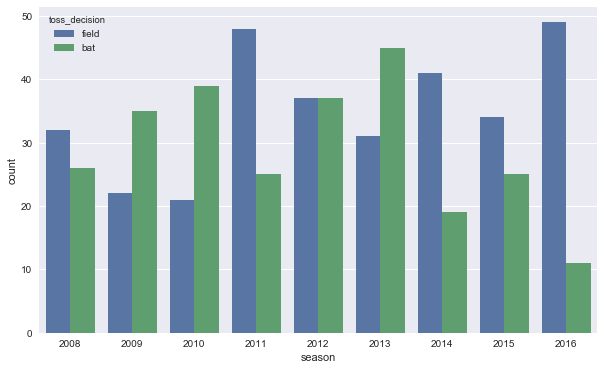

In [13]:
print('Toss Decisions\n',((matches['toss_decision']).value_counts())/577)
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

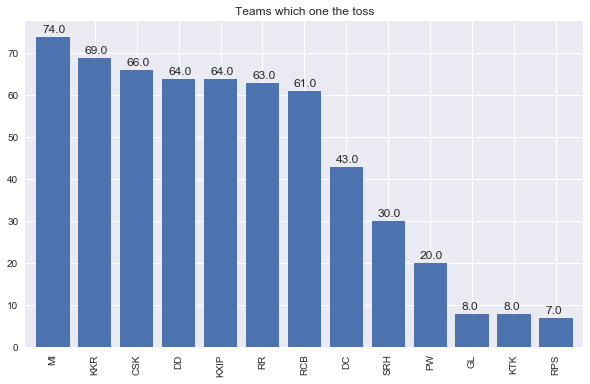

In [14]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.8)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.title('Teams which one the toss')
mlt.show()

Note: Althought Mumbai Indians won the toss the most, Pune Warriors, Gujrat Lions, Kochi Tuskers and Royal Pune Super Giants are all new teams

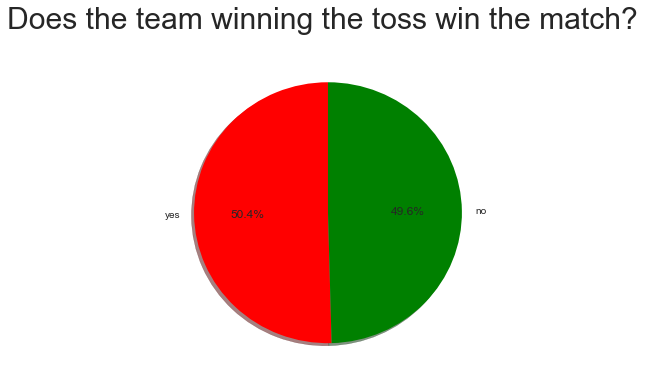

In [15]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.suptitle('Does the team winning the toss win the match?',fontsize = 30)
mlt.show()

# Matches per season

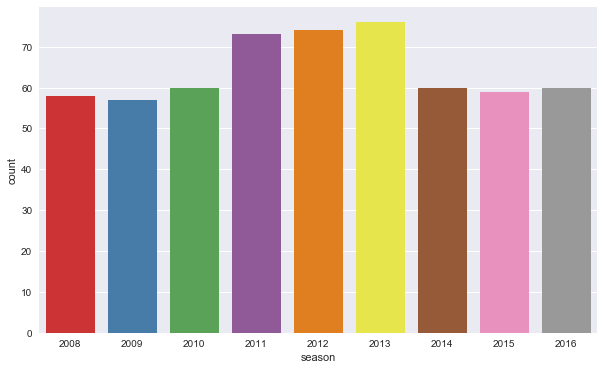

In [16]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette="Set1")  #countplot automatically counts the frequency of an item
sns.ylabel = ('Matches')
sns.plt.show()

# Analysis on number of bounderies (Grouped by 4's and 6's) scored by batsmen in each season

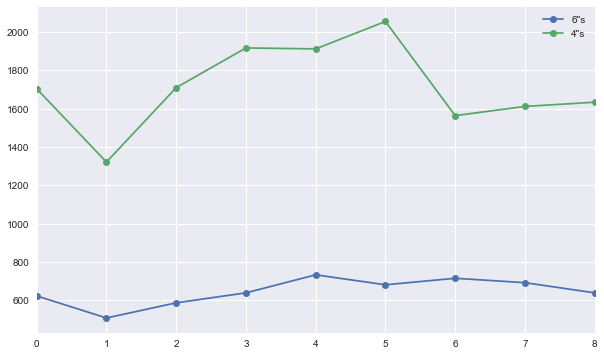

In [19]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)


Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries[['6"s','4"s']].plot(marker='o')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()

In [ ]:
Season_boundaries.head(22)